In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.integrate as si
import numpy.linalg as npla
import pandas as pd
from scipy.sparse.csc import csc_matrix

[[-1.         -0.76604444 -0.17364818  0.5         0.93969262  0.93969262
   0.5        -0.17364818 -0.76604444 -1.        ]
 [-1.64278761 -1.40883205 -0.81643579 -0.14278761  0.29690501  0.29690501
  -0.14278761 -0.81643579 -1.40883205 -1.64278761]
 [-1.98480775 -1.7508522  -1.15845593 -0.48480775 -0.04511513 -0.04511513
  -0.48480775 -1.15845593 -1.7508522  -1.98480775]
 [-1.8660254  -1.63206985 -1.03967358 -0.3660254   0.07366722  0.07366722
  -0.3660254  -1.03967358 -1.63206985 -1.8660254 ]
 [-1.34202014 -1.10806459 -0.51566832  0.15797986  0.59767248  0.59767248
   0.15797986 -0.51566832 -1.10806459 -1.34202014]
 [-0.65797986 -0.4240243   0.16837197  0.84202014  1.28171276  1.28171276
   0.84202014  0.16837197 -0.4240243  -0.65797986]
 [-0.1339746   0.09998096  0.69237723  1.3660254   1.80571802  1.80571802
   1.3660254   0.69237723  0.09998096 -0.1339746 ]
 [-0.01519225  0.21876331  0.81115958  1.48480775  1.92450037  1.92450037
   1.48480775  0.81115958  0.21876331 -0.01519225]


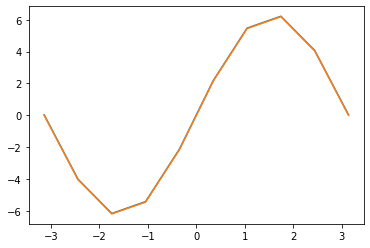

In [52]:
x=np.linspace(-np.pi,np.pi,10)
y=np.linspace(-np.pi,np.pi,10)

x1,y1=np.meshgrid(x,y)
#print(x1,y1)
#print(x,y)

isteps=len(x)
jsteps=len(y)

def f(x0,y0):
    return np.cos(x0)+np.sin(y0)

def FplotExact(y):
    return 2 * np.pi*np.sin(y)

z=f(x1,y1)




print(z)
print(x)
print(y)
#plt.plot(z)
#plt.show()

#plt.contour(x1,y1,z)
#plt.show()


#print(x[0])
#print(z)
print(x.shape)
print(y.shape)
#print(z.shape)


Int=np.zeros(isteps)
for i in range(isteps):
    Int[i]=si.simps(z[i,:],x)#,np.pi/2,-1,'avg')
        
print(Int[0])
print(Int.shape)

plt.plot(x,Int)
plt.plot(x,FplotExact(y))

plt.show()


[-1.         -0.9999998  -0.99999921 ... -0.99999921 -0.9999998
 -1.        ]


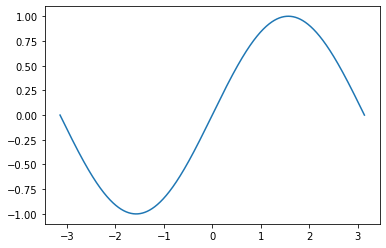

y:  [-1.         -0.9999998  -0.99999921 -0.99999822]
x:  [-3.14159265 -3.14096427 -3.14033589 -3.13970751]


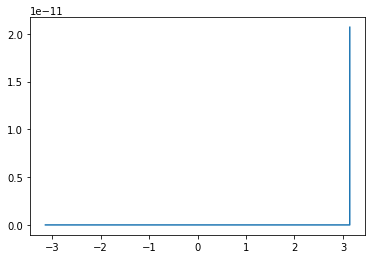

[2.59904945e-15 2.59904945e-15 2.59904945e-15 ... 2.59904945e-15
 2.59904945e-15 2.06772385e-11]


In [36]:
x=np.linspace(-np.pi,np.pi,10000)
isteps=len(x)
dx=max(x)/isteps
y=np.cos(x)
print(y)
#simps
Int=np.zeros(isteps)
for i in range(isteps):
    Int[i]=si.simps(y[:i+1],x[:i+1])
plt.plot(x,Int)
plt.show()
print("y: ",y[:3+1])
print("x: ",x[:3+1])

#reinmann
def integral(y):
    Integral=0.
    for i in range(isteps-1):
        Integral=Integral+2*y[i]*dx
    return Integral

for i in range(isteps-1):
    Int[i]=integral(y)
    
    
plt.plot(x,Int)
plt.show()
print(Int)

(10, 10, 10)
[-3.14159265 -2.44346095 -1.74532925 -1.04719755 -0.34906585  0.34906585
  1.04719755  1.74532925  2.44346095  3.14159265]
[-3.14159265 -2.44346095 -1.74532925 -1.04719755 -0.34906585  0.34906585
  1.04719755  1.74532925  2.44346095  3.14159265]
(10,)
(10,)
[[  0.02722197  -4.0115317   -6.16050764  -5.41417613  -2.12175397
    2.1761979    5.46862006   6.21495157   4.06597563   0.02722197]
 [ -4.0115317   -8.05028536 -10.1992613   -9.45292979  -6.16050764
   -1.86255576   1.42986639   2.1761979    0.02722197  -4.0115317 ]
 [ -6.16050764 -10.1992613  -12.34823724 -11.60190573  -8.30948358
   -4.0115317   -0.71910955   0.02722197  -2.12175397  -6.16050764]
 [ -5.41417613  -9.45292979 -11.60190573 -10.85557422  -7.56315207
   -3.26520019   0.02722197   0.77355348  -1.37542246  -5.41417613]
 [ -2.12175397  -6.16050764  -8.30948358  -7.56315207  -4.27072991
    0.02722197   3.31964412   4.06597563   1.91699969  -2.12175397]
 [  2.1761979   -1.86255576  -4.0115317   -3.26520019 

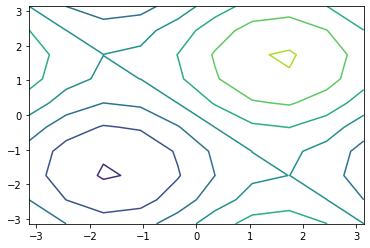

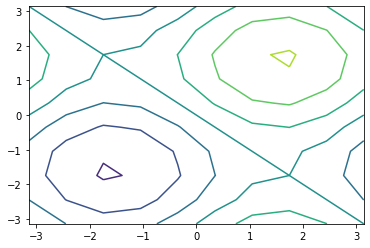

In [88]:
x=np.linspace(-np.pi,np.pi,10)
y=np.linspace(-np.pi,np.pi,10)
z=np.linspace(-np.pi,np.pi,10)

x1,y1,z1=np.meshgrid(x,y,z)
x2,y2=np.meshgrid(x,y)
y3,z3=np.meshgrid(y,z)
#print(x1,y1)
#print(x,y)

isteps=len(x)
jsteps=len(y)

def f(x0,y0,z0):
    return np.cos(x0)+np.sin(y0)+np.sin(z0)

def F(y,z):
    return 2*np.pi*np.sin(y3)+2*np.pi*np.sin(z3)

func=f(x1,y1,z1)
exact=F(y,z)

print(func.shape)
print(x)
print(y)
#plt.plot(z)
#plt.show()

#plt.contour(x1,y1,z)
#plt.show()


#print(x[0])
#print(z)
print(x.shape)
print(y.shape)
#print(z.shape)


Int=np.zeros((isteps,jsteps))
for i in range(isteps):
    for j in range(jsteps):
        Int[i,j]=si.simps(func[i,:,j],x)#,np.pi/2,-1,'avg')
        
print(Int)
print(Int.shape)
print(x2.shape)
print(exact.shape)

plt.contour(x2,y2,Int)#blue
plt.show()

plt.contour(x2,y2,exact)
plt.show()
